# Compound synthesis, design and robotic chemistry 
<font size="3"> In this practical you will explore the synthesis of the follow up compounds from fragments to druglike hits. You will use an amidation reaction to design compound and generate code to execute the synthesis on an OpenTrons system.
This exercise will give you an idea of some design and implementation considerations for automating chemistry for drug-discovery. 
</font>
----

## Part 1: Compound design and synthesis
----
<blockquote cite="https://covid.postera.ai/covid">
The COVID Moonshot is an ambitious crowdsourced initiative to accelerate the development of a COVID antiviral. We work in the open with no intellectual property constraints. This way, any scientist can view submitted drug designs and experimental data to inspire new design ideas. We use our cutting-edge machine learning tools and Folding@home's crowdsourced supercomputer to determine which drug designs to send to our partners to make and test in the lab. With each drug design tested, we get closer to our goal.    
</blockquote>

### Viewing structural information
<font size="3">
You will have a look at some structures collected for compounds submitted to the Moonshot project. 
    
Navigate to Fragalysis: https://fragalysis.diamond.ac.uk/viewer/react/preview/target/Mpro and find compound TRY-UNI-714a760b-6. Select the "Aminopyridine-like" tag and use the search box (Fig. 1). 
<br>    
Optional -> You will notice that your view will be different to the wire frame shown in Fig 1. Experiment with the display control to get other types of views. 
    
<br>
    
<img src="../img/SABS-2021-step1.png">
<strong><em>Fig. 1 - Finding the compound in Fragalysis</em></strong>
    
### Amidation reactions
<br>
<font size="3">
Amidation reactions for the formation of amide functional groups, are extremely useful reactions for drug-discovery. The rate of synthetic success is very high coupled with relatively easy and robust reaction conditions. The amidation reaction is the reaction between a carboxylic acid and a primary/secondary amine (Fig. 2) to form an amide. To get an idea of how different reactions are used for drug-discovery, you can see more examples of useful reactions at: https://doi.org/10.1039/C5SC03115J 
</font>    
<br>

    
<img src="../img/amidation-reaction.png">
<strong><em>Fig. 2: (a) Example of primary amine and (b) secondary amine amidation reactions</em></strong>

### Disconnections and identifying amides
<br>
<font size="3">
    
Looking at TRY-UNI-714a760b-6, you will notice the presence of an amide bond, making this a good candidate for synthesising via an amidation reaction. See how the amide bond has been "broken" or "disconnected" in Fig. 3.   

<br>
<img src="../img/TRY-UNI-example-step-1-disc.jpg">
<strong><em>Fig. 3: Possible approach to synthesising TRY-UNI-714</em></strong>
    
<br>
<img src="../img/retrosynthesis-example.png">
<strong><em>Fig. 4: Retrosynthesis strategy to get reaction and starting materials for TRY-UNI-714</em></strong>


</font>


## Part 2: Design your own compound
<br>
<font size="3">
Assume that your current inventory only allows for amidation types of chemistry. In Fragalysis, have a look at some of the other "aminopyridine-like" compounds. Identify one that looks interesting to synthesise using an amidation reaction. You can also try adding extra groups or vectors to enumerate the TRY-UNI-714 example.
    
Using a disconnection or retrosynthesis strategy for an amidation reaction, you will need to get the:
- Names of the amine and carboxylic acid starting materials 
- SMILES of the target product

- For converting structures to SMILES, use -> http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html
- For finding names associated with SMILES, you can use PubChem -> https://pubchem.ncbi.nlm.nih.gov/
</font>

<font size="3">
OK, so we've an idea of what our starting materials look like. Let's convert the starting material names into SMILES, a machine-readable format. SMILES are extremely useful for machines but chemist's feel more comfortable using names and especially images. In the next section, you will use query the NCI Cactus Resolver tool -> https://cactus.nci.nih.gov to convert the chemical names of our starting materials into SMILES which you'll then use to generate some images. The SMILES will be stored as a list in 'smiles'  
</font>

In [65]:
from rdkit import Chem
# Substitute your starting material names in the python list below
starting_material_names = ["4-methylpyridin-3-amine","(3-chlorophenyl)acetic acid"]

# Substitute your product SMILES in the string below
product_smiles = "O=C(Nc1cnccc1C)Cc1cccc(Cl)c1"

<font size="3">
    Test your product SMILES and see what it looks like by running the cell below.
<font>

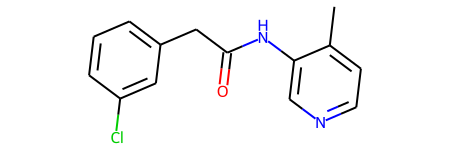

In [66]:
Chem.MolFromSmiles(product_smiles)

<font size="3">
The NIH has a neat service, Cactus, that can convert chemical names into SMILES. The code block below has a function -> CIRconvert, that makes use of the Cactus API to convert chemical names into SMILES. Can you think of other ways to generate SMILES from a name/structure? 
<font>

In [67]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(name):
    try:
        name_to_convert = quote(name)
        url= 'https://cactus.nci.nih.gov/chemical/structure/' + name_to_convert + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        smiles = ans.split(' ')[0]
        return smiles
    except:
        return 'Did not work'

<font size="3">
In the next code block, you will use the CIRconver function to convert your starting materials into SMILES
<font>

In [68]:
identifiers  = starting_material_names

reactant_smiles = []
for ids in identifiers :
    reactant_smiles.append(CIRconvert(ids))

<font size="3">
You should see two SMILES in a list after running the next code block.
<font>

In [69]:
reactant_smiles

['Cc1ccncc1N', 'OC(=O)Cc1cccc(Cl)c1']

<font size="3">
Now that you've got some SMILES, you can generate some rdkit mol objects and draw some images. These are the compounds that you will use in the OpenTrons robotic synthesis procedure.    
</font>

In [70]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(smi) for smi in reactant_smiles]

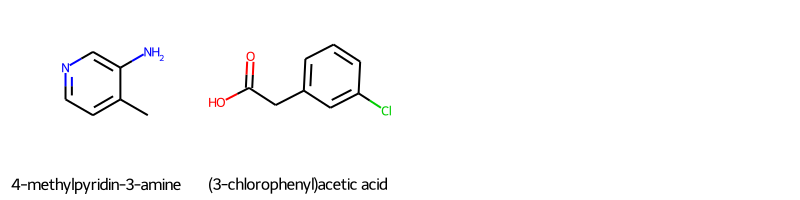

In [71]:
legends = [name for name in starting_material_names]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)

## Part 3: Using encoded recipes

<font size="3">
Now that we have our starting materials in a SMILES, let's have a look at using an encoded recipe format. Traionally, chemists would document recipes in a paragraph like format. Shown below is the human readable form of an amidation reaction perfromed on an OpenTrons robot. 

<blockquote>
Iteration 1.0 - Imidazole 1((4-(1H-imidazole-1-carbonyl)piperazin-1-yl)(furan-2-yl)methanone) was dissolved in MeCN (500 mM) and dispensed (0.06 mmol, 120uL) in 58 wells of two 96-well reaction racks (StarLab 2mL). Iodomethane (15 eq, 56uL) was added in each well and reaction rack was covered with a plastic mat. After 24 hours the mixture was concentrated (SPE-Dry, heated nitrogen 96-head dispenser) and K2CO3 (>1.5 eq, >12.4 mg) was added. 58 amines in DMF (1.1 eq, 0.067 mmol, 132 uL from a 500mM stock) were dispensed in each of the mixture containing wells followed by the addition of a further volume of DMF (132 uL). The mixture was concentrated after 24 hours (SPE-dry) and partitioned in DCM (300uL) and an aqueous solution (3M HCl, 300uL). The organic extracts were transferred (250uL) to a 96-well plate (Starlab, 300uL) and the DCM removed overnight. DMSO was added (189uL, 250 mM) to dissolve the crude reaction mixtures and make a stock plate used to prepare one QC plate (LCMS) and two screening plates (in dmso and ethylene glycol).
</blockquote>

To automate reactions, an encoded recipe format that is both human and machine readable is what we are after. Both JSON and Python dictionary formats do a very good job of assigning keys to values that make writing a machine and human readable format possible. Shown below is an example of the encoded version of the amidation recipe. Notice the different key-value pairs with "actions" containing the actual actions or instructions for the synthesis.  
</font>

In [72]:
encoded_recipes  = {
    "Amidation": {
        "reactionSMARTS": "[#6:1](=[#8:2])-[#8].[#7;H3,H2,H1:3]>>[#6:1](=[#8:2])-[#7:3]",
        "recipes": {
            "Standard": {
                "reference": None,
                "actions": [
                    {
                        "name": "add",
                        "content": {
                            "action_no": 1,
                            "material": {
                                "SMARTS": "[#6](=[#8])-[#8]", # SMARTS pattern for carboxylic acid
                                "SMILES": None,
                                "quantity": {"value": 1.0, "unit": "moleq"},
                                "solvent": "DMA",
                                "concentration": 0.5,
                            },
                        },
                    },
                    {
                        "name": "add",
                        "content": {
                            "action_no": 2,
                            "material": {
                                "SMARTS": None,
                                "SMILES": "CCCP1(=O)OP(=O)(OP(=O)(O1)CCC)CCC", #SMILES pattern for T3P
                                "quantity": {"value": 1.2, "unit": "moleq"},
                                "solvent": "DMA",
                                "concentration": 0.5,
                            },
                        },
                    },
                    {
                        "name": "add",
                        "content": {
                            "action_no": 3,
                            "material": {
                                "SMARTS": None,
                                "SMILES": "CCN(C(C)C)C(C)C", #SMILES pattern for amine base
                                "quantity": {"value": 3.5, "unit": "moleq"},
                                "solvent": None,
                                "density": 0.74,
                                "concentration": None,
                            },
                        },
                    },
                    {
                        "name": "add",
                        "content": {
                            "action_no": 4,
                            "material": {
                                "SMARTS": "[#7;H3,H2,H1]", #SMARTS pattern for amine
                                "SMILES": None,
                                "quantity": {"value": 1.1, "unit": "moleq"},
                                "solvent": "DMA",
                                "concentration": 0.5,
                            },
                        },
                    },
                    {
                        "name": "stir",
                        "content": {
                            "action_no": 5,
                            "temperature": {"value": 25, "unit": "degC"},
                            "duration": {"value": 12, "unit": "hours"},
                        },
                    },
                ],
            },
        },
    },
}

<font size="3">
You have so far seen SMILES as a way to represent a molecule as a machine readable format, but what about executing reactions? This is where SMARTS come into play where patterns can be set as SMARTS and rules encoded for a reaction. Let's look at the amidation SMARTS pattern and how it can be used.
</font>

In [73]:
# Get the amidation reaction SMARTS pattern from the encoded recipe
reaction_smarts = encoded_recipes["Amidation"]["reactionSMARTS"]
print("The reaction SMARTS pattern is: {}".format(reaction_smarts))

The reaction SMARTS pattern is: [#6:1](=[#8:2])-[#8].[#7;H3,H2,H1:3]>>[#6:1](=[#8:2])-[#7:3]


<font size="3">
Reading from left, the reactant SMARTS are seperated by a '.' and the SMARTS pattern is broken up into a reactants and product section seperated by the '>>'.  
</font>

In [74]:
reactant_smarts = reaction_smarts.split(">>")[0]
product_smarts = reaction_smarts.split(">>")[1]
print("The two reactant SMARTS patterns are: {} and {}".format(reactant_smarts.split(".")[0],
                                                               reactant_smarts.split(".")[1]))
print("The product SMARTS pattern is: {}".format(product_smarts))

The two reactant SMARTS patterns are: [#6:1](=[#8:2])-[#8] and [#7;H3,H2,H1:3]
The product SMARTS pattern is: [#6:1](=[#8:2])-[#7:3]


<font size="3">
Looking at the reactant SMARTS patterns, notice how the the "#number" are enclosed in brackets. Each number is the atomic number of an element. So "#6" -> Carbon with the ":"followed by the number 1 (Can be any number) used as a way to label/index that carbon atom. This way, the connections can be mapped based on the labellling and atomic numbers/types of elements. Bonds are indicated by "=" and "-". For more on SMARTS patterns see -> https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html  
</font>

## 3.1: Getting our molecules in a row
<br>
<font size="3">
Now that we have the amidation SMARTS pattern, we can use it to assign the correct order we need for our encoded recipe to work by "reacting" the two reactant SMILES using the reaction SMARTS until the product matches our product. Have a look at the two functions below. canonSmiles makes sure that our SMILES are normalised or canonicalized. getAddtionOrder finds the correct addition order of your starting materials based on pattern matching with the reaction SMARTS pattern. NB The order of reactant SMARTS patterns are important and taken as the order in which reactants need to be virtually "reacted" to yield a product.   
</font>

In [75]:
from rdkit.Chem import AllChem
import itertools

def canonSmiles(smiles: str):
    """
    Canonicalise smiles
    
    Args:
        smiles (str): SMILES to canonicalise

    Returns:
        canon_smiles (str): Canonicalised SMILES 
    """
    canon_smiles = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))
    return canon_smiles

def getAddtionOrder(product_smi: str, reactant_SMILES: list, reaction_SMARTS: str):
    """
    Gets reactant pair addition order from reaction_smarts

    Args:
        product_smi (str): product SMILES
        reactant_SMILES_pair (list): List of reactant smiles
        reaction_SMARTS (str): reaction SMARTS pattern

    Returns:
        reactant_SMILES_pair (list): List of reactant smiles in correct order
        None: If no match is found between the reactants and the reaction smarts
    """
    product_smi = canonSmiles(smiles=product_smi)
    reactant_SMILES = [canonSmiles(smiles=smi) for smi in reactant_SMILES]
    
    rxn = AllChem.ReactionFromSmarts(reaction_SMARTS)
    reactant_mols = [Chem.MolFromSmiles(smi) for smi in reactant_SMILES]

    for reactant_permutation in list(itertools.permutations(reactant_mols)):
        try:
            products = rxn.RunReactants(reactant_permutation)
            product_mols = [product[0] for product in products]
            if not product_mols:
                continue  # reactants were in wrong order so no product
        except Exception as e:
            print(e)
            print(reactant_permutation)
            continue
        product_smis = [Chem.MolToSmiles(m) for m in product_mols if m is not None]
        if product_smi in product_smis:
            ordered_smis = [Chem.MolToSmiles(m) for m in reactant_permutation]
    if "ordered_smis" in locals():
        return ordered_smis
    else:
        print(reaction_SMARTS)
        print(reactant_SMILES)
        return None

<font size="3">
After calling the SMILES addtion ordering function (getAddtionOrder) below, you should have two SMILES in a list re-ordered/checked that they follow the addtion order required in the reaction SMARTS pattern and the addition order indcated in the enocoded recipe. The carboxylic acid reactant should be added first (Add action number 1) followed by the amine reactant(Add action number 4). This exactly what we need as before the amine is added, the carboxylic acid needs to be activated, make the OH a better leaving group, with the addition of the activator 1-Propanephosphonic anhydride solution (T3P) and the amine base.    
</font>

In [76]:
# Call the function with your product and reactant SMILES
ordered_smiles = getAddtionOrder(product_smi = product_smiles, 
                                 reactant_SMILES = reactant_smiles, 
                                 reaction_SMARTS = reaction_smarts)
ordered_smiles

['O=C(O)Cc1cccc(Cl)c1', 'Cc1ccncc1N']

## Part 3.2: Calculating amounts needed for synthesis 
<br>
<font size="3">
With the addition order sorted, you now need to calculate the amounts required for the amidation reaction. Looking at the "add" actions in the encoded recipe for the Amidation reaction, notice the key-value pair for "quantity". This is where you will get the mol equivalents for the synthesis. Also notice the other key-values of "solvent" and "concentration", as we will be using a liquid handling robot, you need to prepare solutions. To help with the calculations, have a look at the functions in the followig code block.
<font>

In [77]:
from rdkit.Chem.Descriptors import ExactMolWt

def getMW(smiles):
    mol = Chem.MolFromSmiles(smiles)
    MW = ExactMolWt(mol)
    return MW

def getMols(mass,MW):
    mols = (mass / 1000) / MW
    return mols

def calculateVolume(molar_eqv, target_mols, concentration=None, density=None, MW=None):
    mol_material = molar_eqv * target_mols
    if density:
        vol_material = ((mol_material * MW) / density) * 1e3
    else:
        vol_material = (mol_material / concentration) * 1e6  # in uL
    return vol_material

<font size="3">
Before calculating the reactant and reagent amounts, you need to calculate how much product in mols, you'd like to synthesise. 
<font>

In [78]:
# You can play with different target_masses to see the impact on the starting material volumes required.
target_mass_mg = 10
target_MW = getMW(smiles=product_smiles)
target_mols = getMols(mass=target_mass_mg, MW = target_MW)
target_mols

3.8450943641794715e-05

<font size="3">
Run the code block to see what robotic actions you will need to execute for your amidation reaction
<font>

In [79]:
robotic_actions = encoded_recipes["Amidation"]["recipes"]["Standard"]["actions"] 
robotic_actions

[{'name': 'add',
  'content': {'action_no': 1,
   'material': {'SMARTS': '[#6](=[#8])-[#8]',
    'SMILES': None,
    'quantity': {'value': 1.0, 'unit': 'moleq'},
    'solvent': 'DMA',
    'concentration': 0.5}}},
 {'name': 'add',
  'content': {'action_no': 2,
   'material': {'SMARTS': None,
    'SMILES': 'CCCP1(=O)OP(=O)(OP(=O)(O1)CCC)CCC',
    'quantity': {'value': 1.2, 'unit': 'moleq'},
    'solvent': 'DMA',
    'concentration': 0.5}}},
 {'name': 'add',
  'content': {'action_no': 3,
   'material': {'SMARTS': None,
    'SMILES': 'CCN(C(C)C)C(C)C',
    'quantity': {'value': 3.5, 'unit': 'moleq'},
    'solvent': None,
    'density': 0.74,
    'concentration': None}}},
 {'name': 'add',
  'content': {'action_no': 4,
   'material': {'SMARTS': '[#7;H3,H2,H1]',
    'SMILES': None,
    'quantity': {'value': 1.1, 'unit': 'moleq'},
    'solvent': 'DMA',
    'concentration': 0.5}}},
 {'name': 'stir',
  'content': {'action_no': 5,
   'temperature': {'value': 25, 'unit': 'degC'},
   'duration': {'

<font size="3">
In the next code block, the volumes for the reactants (carboxylic acid and amine) and reagents (amine base and T3P) will be calculated based on the target mass of the product required and the molar equivalents from the "add" actions in the encoded recipe.   
</font>

In [80]:
volume_info = {}
for action in robotic_actions:
    if action["name"] == "add":
        
        molar_eqv = action["content"]["material"]["quantity"]["value"]
        solvent = action["content"]["material"]["solvent"]
        action_no = action["content"]["action_no"]
        
        if solvent:
            concentration = action["content"]["material"]["concentration"]
            
            volume = calculateVolume(molar_eqv=molar_eqv, 
                                     target_mols=target_mols, 
                                     concentration=concentration)
            volume_info["Volume to add for add action no: {}".format(action_no)] = volume
        if not solvent:
            reactant_density = action["content"]["material"]["density"]
            reactant_SMILES = action["content"]["material"]["SMILES"]
            reactant_MW = getMW(smiles = reactant_SMILES)
            volume = calculateVolume(molar_eqv=molar_eqv,
                                                   target_mols=target_mols,
                                                   density=reactant_density, 
                                                   MW=reactant_MW)
            volume_info["Volume (ul) to add for add action no: {}".format(action_no)] = volume

volume_info

{'Volume to add for add action no: 1': 76.90188728358943,
 'Volume to add for add action no: 2': 92.28226474030731,
 'Volume (ul) to add for add action no: 3': 23.487869268861303,
 'Volume to add for add action no: 4': 84.59207601194838}

 ## Part 4: Performing a robotic synthesis on the OpenTrons 
---

<font size="3">
In this section, you will use the calculated volumes to execute the synthesis of your designed compound on an OpneTrons robot. You will use the OpenTrons Python API to transfer the reactant and reagent volumes into a well on a 96 array well plate. You can think of each well as a reactor. The OpenTrons deck's setup is shown in Fig. 5 along with the location of the reactants, labware names/position and the colors used in the demo. 
    
<img src="../img/OT-deck.png">
<strong><em>Fig. 5 - Labware, trough and reaction plate setup on OpenTrons deck</em></strong>
</font>

<font size="3">
In the next code block, you will simulate your synthesis on an OpneTrons! Please note that the code will not ru until you have edited in the deck index postions. You will also get to add some OpenTrons Python API commands to complete the synthesis of your design.  
<font>

In [64]:
from opentrons import simulate
protocol = simulate.get_protocol_api('2.11')

# Load tipracks and assign a rack position - you will need to insert the correct well plate index!
tiprack_deck_index = "XX"
tiprack_1 = protocol.load_labware('opentrons_96_tiprack_300ul', tiprack_deck_index)

# Load a p300 single channel pipette
p300 = protocol.load_instrument('p300_single', 'right', tip_racks=[tiprack_1])

# Load the labware and assign the deck indices
reactant_vials_deck_index = "XX"
reactant_plate_deck_index = "XX"
reactant_vials = protocol.load_labware('opentrons_24_tuberack_eppendorf_1.5ml_safelock_snapcap', 
                                        reactant_vials_deck_index)
reaction_plate = protocol.load_labware('corning_96_wellplate_360ul_flat', reactant_plate_deck_index)
 
# The first addition is shown for the add action one
volume_to_add = volume_info['Volume to add for add action no: 1']
p300.transfer(volume_to_add, reactant_vials['A1'].bottom(2), reaction_plate['B2'].top(-5), air_gap = 15)

# Add in the commmands to complete the four add actions

/home/warren/.opentrons/robot_settings.json not found. Loading defaults
/home/warren/.opentrons/deck_calibration.json not found. Loading defaults


<InstrumentContext: p300_single_v1 in RIGHT>

## Recap
<br>
<font size="3">
Well done for following the design and simulated automated synthesis to the end! In this exercise, we completed the synthesis of one compound, and you will have a better idea of the considerations required for executing automated synthesis. Now imagine, we want to execute 100s - 1000s of different chemical reactions on a single session on the OpenTrons! Some design and smarter ways are needed as trying to track and code this will become a nightmare very quickly. In the next bit of this session, you will be shown how XChem is approaching this with CAR (Chemist Assisted Robotics) and all going well, a live demo on the robot.   
<font>